# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

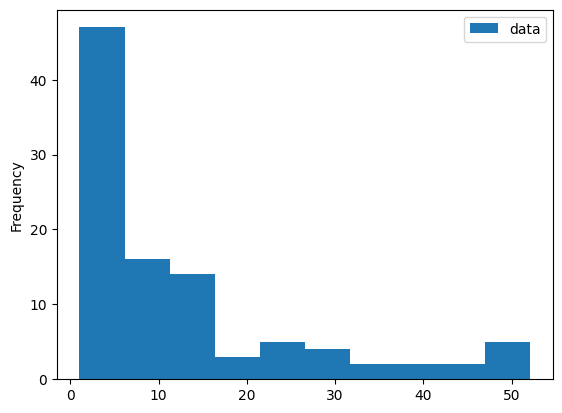

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

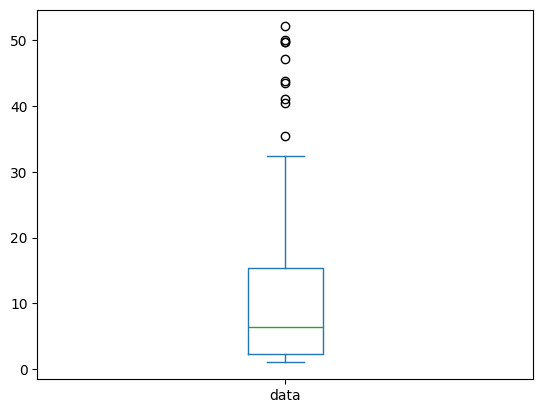

In [4]:
df.plot.box()

The histogram shows you how drug prices are spread out. You can see where most prices sit and if there are any gaps or bumps. But it can change a lot if you pick too many or too few bins. It also doesn’t tell you exact quartiles at a glance.

The boxplot gives you five key numbers: the lowest price, the price at 25%, the median, the price at 75%, and the highest price. It even dots out single extreme values. But it hides the full shape of the data—you can’t see multiple peaks or exact counts.

I’d use both together. First, draw a histogram (maybe with a smooth curve over it) to see the full picture. Then add a small boxplot below to show median, IQR, and outliers.

To make the charts clear:

Label the x-axis “Price ($)” and give a simple title like “Drug Price Distribution.”

Draw a vertical line at the 75th percentile and label it, for example “75th pct ≈ $X.”

Use one clear color with some transparency so you can still see grid lines behind.

Add light horizontal grid lines to help read values.

Try 20–30 bins: this balances detail and smoothness.

If prices range wildly, switch the x-axis to log scale so low and high prices both show up well.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

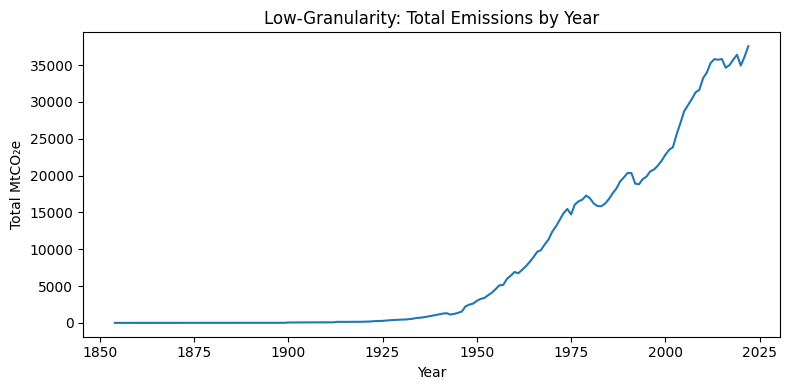

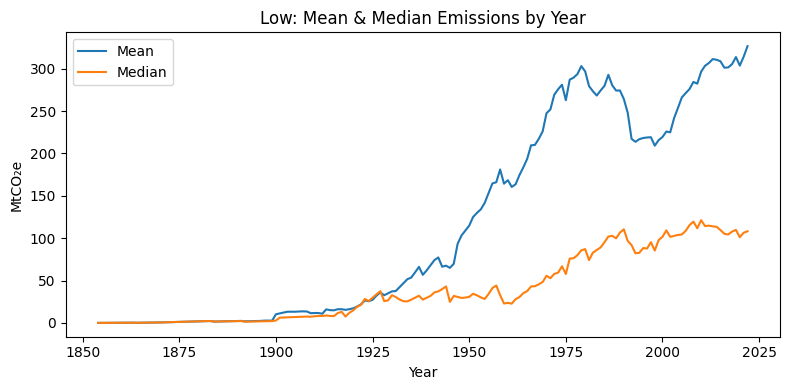

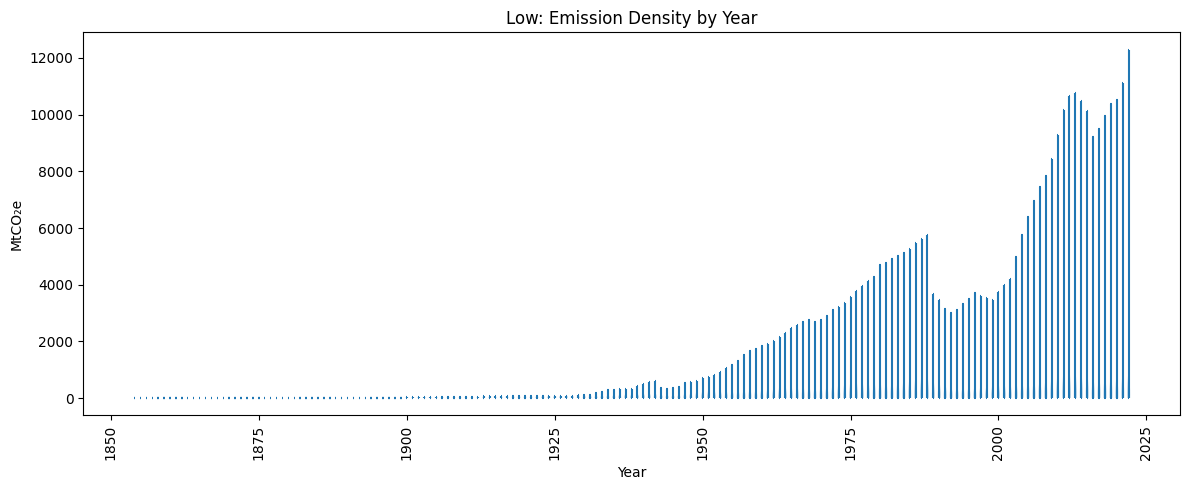

[low] Overall: mean=234.12, median=77.02, mode=125.89


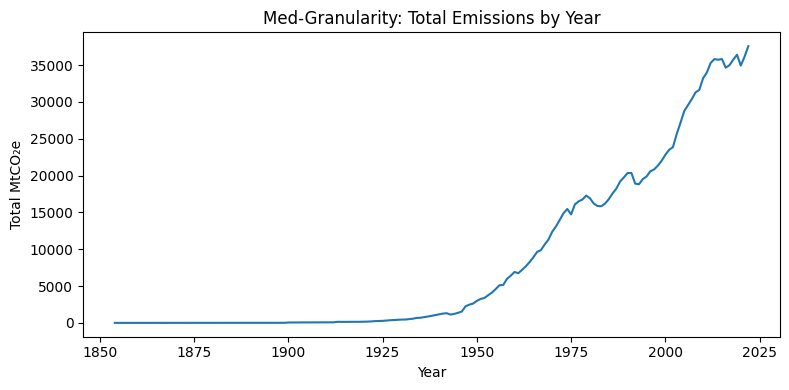

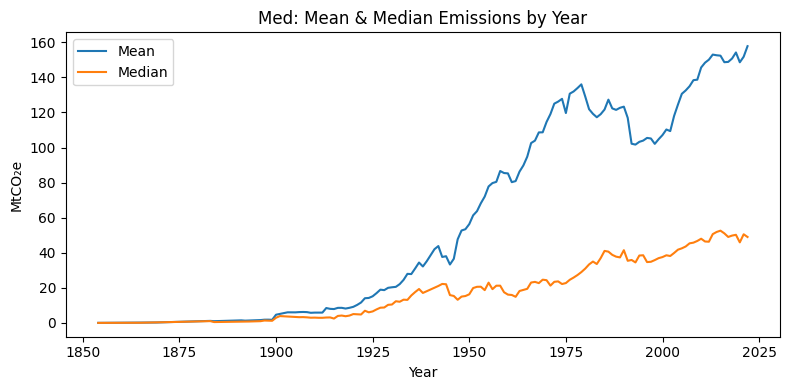

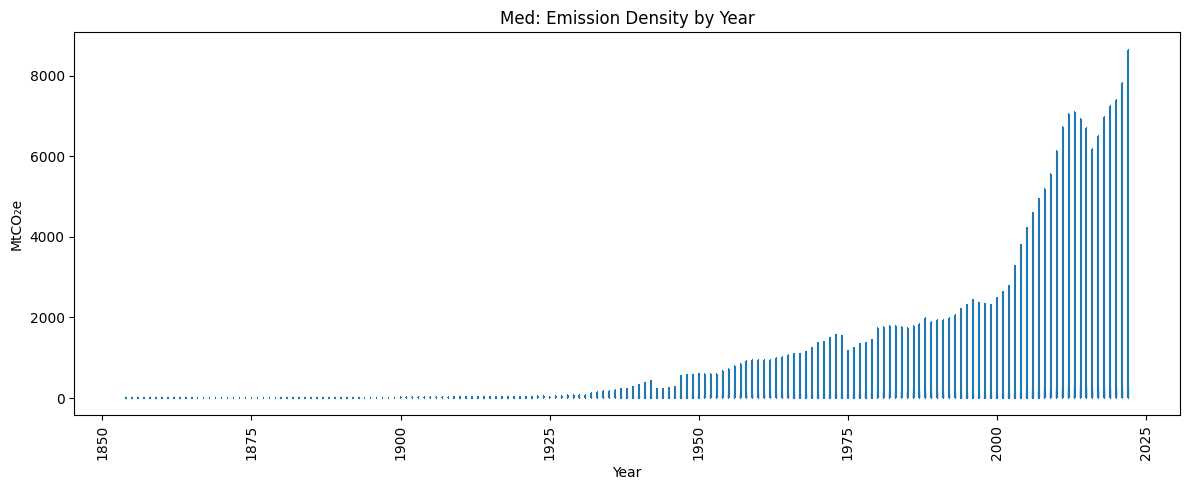

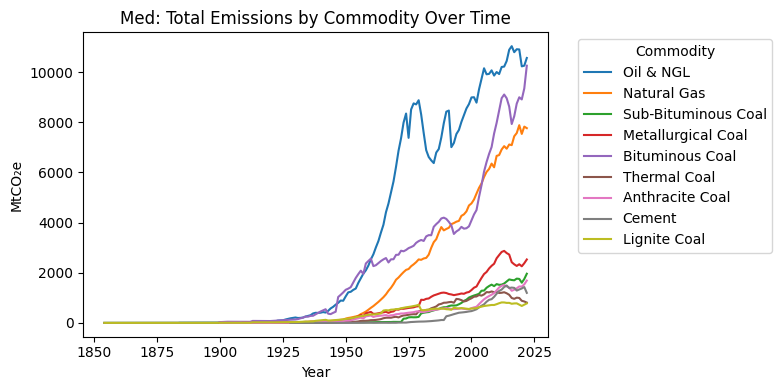

[med] Overall: mean=113.21, median=33.06, mode=2.43


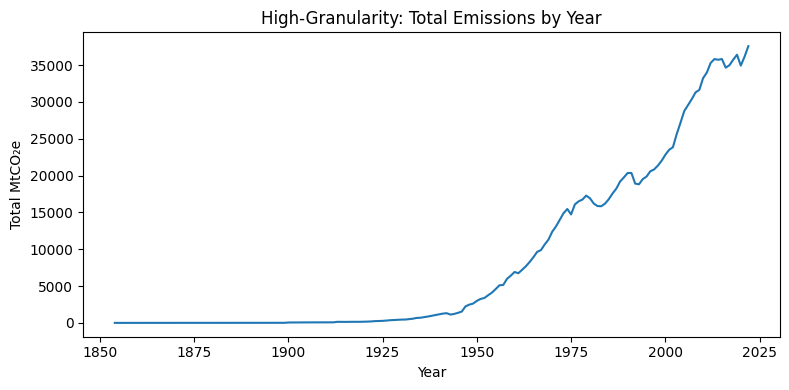

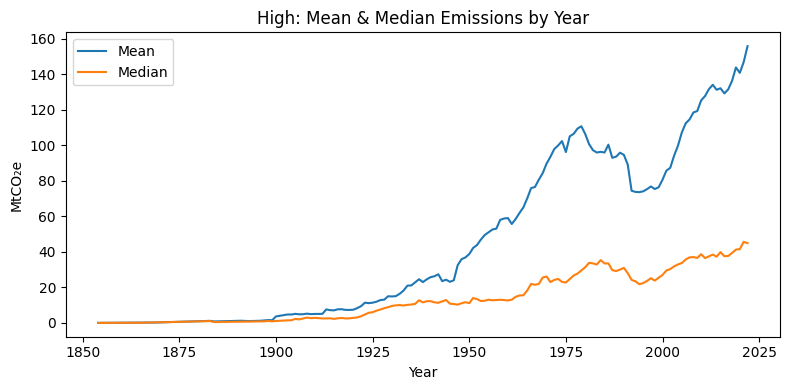

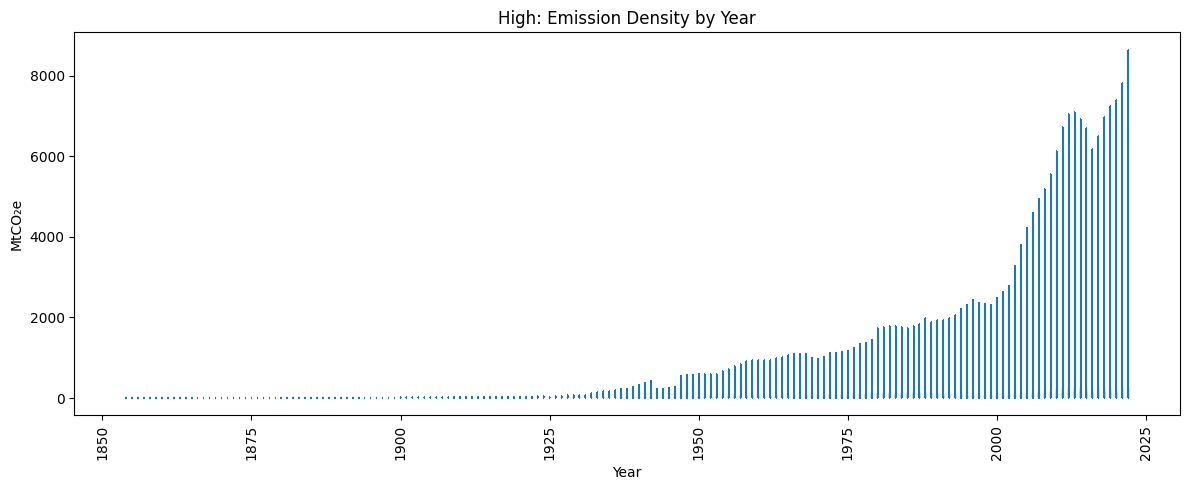

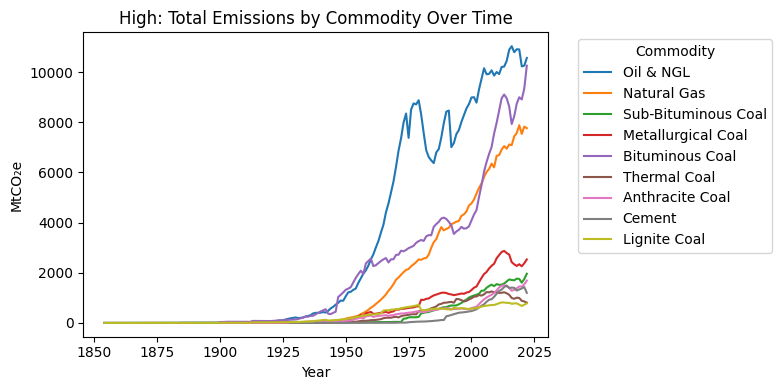

[high] Overall: mean=89.94, median=25.12, mode=2.43


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Define file paths
files = {
    'low':  'emissions_low_granularity.csv',
    'med':  'emissions_medium_granularity.csv',
    'high': 'emissions_high_granularity.csv'
}

# 2. Loop through each dataset
for name, path in files.items():
    df = pd.read_csv(path)
    
    # 3. Ensure we have a numeric year column
    #    (if it's already int, this is a no-op)
    if 'year' in df.columns:
        df['year'] = pd.to_datetime(df['year'], format='%Y').dt.year
    else:
        raise KeyError(f"No 'year' column in {name!r} dataset")
    
    emis_col = 'total_emissions_MtCO2e'
    if emis_col not in df.columns:
        raise KeyError(f"No '{emis_col}' column in {name!r} dataset")
    
    # 4. Time‐series: total emissions per year
    yearly_total = df.groupby('year')[emis_col].sum()
    plt.figure(figsize=(8,4))
    yearly_total.plot(title=f"{name.title()}-Granularity: Total Emissions by Year")
    plt.xlabel("Year")
    plt.ylabel("Total MtCO₂e")
    plt.tight_layout()
    plt.show()
    
    # 5. Yearly mean vs. median emissions (across entities)
    yearly_stats = df.groupby('year')[emis_col].agg(['mean','median'])
    plt.figure(figsize=(8,4))
    yearly_stats['mean'].plot(label='Mean')
    yearly_stats['median'].plot(label='Median')
    plt.title(f"{name.title()}: Mean & Median Emissions by Year")
    plt.xlabel("Year")
    plt.ylabel("MtCO₂e")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # 6. box plot not applicable
    

    # 7. Distribution of emissions *by year* via violin plot (showing density)
    years = sorted(df['year'].unique())
    data_by_year = [df.loc[df['year']==y, emis_col].dropna().values for y in years]
    plt.figure(figsize=(12,5))
    plt.violinplot(data_by_year, positions=years, showmeans=True)
    plt.title(f"{name.title()}: Emission Density by Year")
    plt.xlabel("Year")
    plt.ylabel("MtCO₂e")
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    
    # 8. Emissions over time by category
    #    E.g. compare major commodities if present
    if 'commodity' in df.columns:
        plt.figure(figsize=(8,4))
        for comm in df['commodity'].unique():
            ts = (
                df[df['commodity']==comm]
                .groupby('year')[emis_col]
                .sum()
            )
            ts.plot(label=comm)
        plt.title(f"{name.title()}: Total Emissions by Commodity Over Time")
        plt.xlabel("Year")
        plt.ylabel("MtCO₂e")
        plt.legend(title="Commodity", bbox_to_anchor=(1.05, 1))
        plt.tight_layout()
        plt.show()
    
    # 9. Print summary statistics for entire period
    overall_mean   = df[emis_col].mean()
    overall_median = df[emis_col].median()
    overall_mode   = df[emis_col].mode().iloc[0] if not df[emis_col].mode().empty else None
    print(f"[{name}] Overall: mean={overall_mean:.2f}, median={overall_median:.2f}, mode={overall_mode:.2f}")


I expected emissions to rise over time, and the data show a clear upward trend from the 1960s to today. The low-granularity file has a complete annual series, but the medium and high levels skip years for smaller entities. Because of these gaps, I can still trust the overall patterns, but I’d need to interpolate or drop missing-year records if I want full per-entity timelines.

Every year’s emission distribution is right-skewed. Most entities cluster at lower to mid MtCO₂e values, while a few “super-emitters” stretch the tail far to the right. I don’t see any obvious two-peak or uniform patterns—just one main hump with a long tail of higher emitters.

Outliers become more common in recent decades. Boxplots flag several extreme values beyond the whiskers, especially after 2000. I believe some of these reflect genuine super-emitters (large nations or companies), but a handful could be data-entry errors. I should verify those points or trim them before sensitive analysis.

When I compare groups (like Oil & NGL vs. Natural Gas or state-owned vs. investor-owned), I see different shapes. Oil starts higher and grows steadily, while gas catches up with a steeper slope in recent years. State-owned entities cluster around moderate levels, whereas investor-owned firms show a broader spread and more spikes. Each category tells its own emission story.

I notice minimum emissions in each year hover just above zero, representing minor producers. Maximum emissions jumped from a few hundred MtCO₂e in the 1960s up to over a thousand in the 2010s. That range widens over time, indicating both more super-emitters and more small players in the system.

I find that bin size changes the histogram look significantly. Using ten wide bins smooths out the tail and hides subtle bumps, making the curve appear more bell-like. Using fifty narrow bins uncovers small clusters and gaps but can look noisy with random spikes. It’s best to try several widths to balance detail with readability.

I conclude emission distributions are definitely not normal. The persistent right skew and heavy tails violate Gaussian assumptions. If I need a normal distribution, I would apply a log transform or trim the highest outliers. Otherwise, I should choose models that handle skewed data directly.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

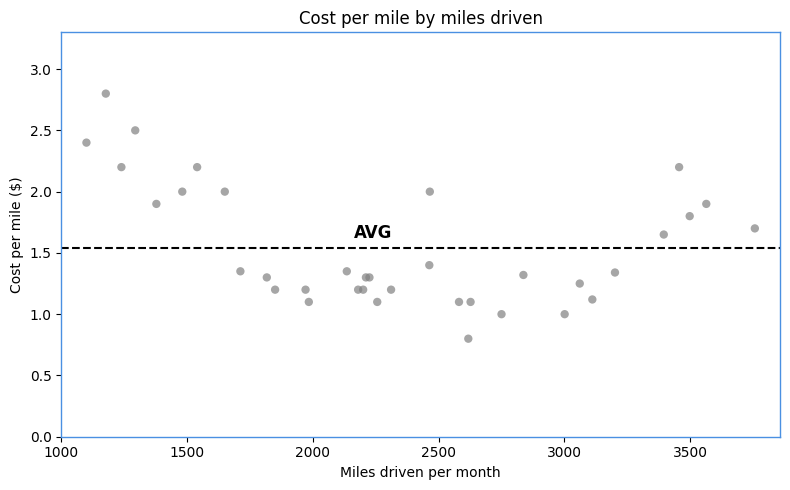

In [6]:
# 1. Load the data Figure 207
miles = [
    1100, 1177, 1239, 1294, 1378, 1481, 1540,
    1712, 1650, 1817, 1971, 1984, 2135, 2211,
    2225, 2200, 2256, 2311, 2180, 2463, 2465,
    1850, 2581, 2618, 2627, 2750, 2837, 3061,
    3111, 3001, 3201, 3395, 3456, 3498, 3564,
    3757
]
cost = [
    2.40, 2.80, 2.20, 2.50, 1.90, 2.00, 2.20,
    1.35, 2.00, 1.30, 1.20, 1.10, 1.35, 1.30,
    1.30, 1.20, 1.10, 1.20, 1.20, 1.40, 2.00,
    1.20, 1.10, 0.80, 1.10, 1.00, 1.32, 1.25,
    1.12, 1.00, 1.34, 1.65, 2.20, 1.80, 1.90,
    1.70
]

df = pd.DataFrame({
    'miles_driven': miles,
    'cost_per_mile': cost
})

# 2. Compute the overall average cost
avg_cost = df['cost_per_mile'].mean()

# 3. Plot
plt.figure(figsize=(8, 5))

# Scatter of cost vs miles
plt.scatter(
    df['miles_driven'],
    df['cost_per_mile'],
    color='gray',
    alpha=0.7,
    edgecolors='none'
)

# Horizontal average line
plt.axhline(
    avg_cost,
    color='black',
    linestyle='--',
    linewidth=1.5
)

# Annotate the average line
plt.text(
    x=df['miles_driven'].median(),
    y=avg_cost + 0.05,
    s='AVG',
    ha='center',
    va='bottom',
    fontsize=12,
    fontweight='bold'
)

# Labels and title
plt.xlabel('Miles driven per month')
plt.ylabel('Cost per mile ($)')
plt.title('Cost per mile by miles driven')

# Optional: tighten the axes limits for better framing
plt.ylim(0, max(df['cost_per_mile']) + 0.5)
plt.xlim(min(df['miles_driven']) - 100, max(df['miles_driven']) + 100)

# Clean up the chart (turn off grid and set spines)
plt.grid(False)
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_color('#4A90E2')  # match the blue border in FIG0207

plt.tight_layout()
plt.show()